Copyright (C) 1997-2015 The R Core Team

In [1]:
### Examples from: "An Introduction to Statistical Modelling"
###			By Annette Dobson
###
### == with some additions ==

require(stats); require(graphics)

In [2]:
## Plant Weight Data (Page 9)
ctl <- c(4.17,5.58,5.18,6.11,4.50,4.61,5.17,4.53,5.33,5.14)
trt <- c(4.81,4.17,4.41,3.59,5.87,3.83,6.03,4.89,4.32,4.69)
group <- gl(2,10, labels=c("Ctl","Trt"))
weight <- c(ctl,trt)
anova  (lm(weight~group))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
group,1,0.688205,0.6882050,1.419101,0.2490232
Residuals,18,8.729250,0.4849583,NA,NA


In [3]:
summary(lm(weight~group -1))


Call:
lm(formula = weight ~ group - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0710 -0.4938  0.0685  0.2462  1.3690 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
groupCtl   5.0320     0.2202   22.85 9.55e-15 ***
groupTrt   4.6610     0.2202   21.16 3.62e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6964 on 18 degrees of freedom
Multiple R-squared:  0.9818,	Adjusted R-squared:  0.9798 
F-statistic: 485.1 on 2 and 18 DF,  p-value: < 2.2e-16


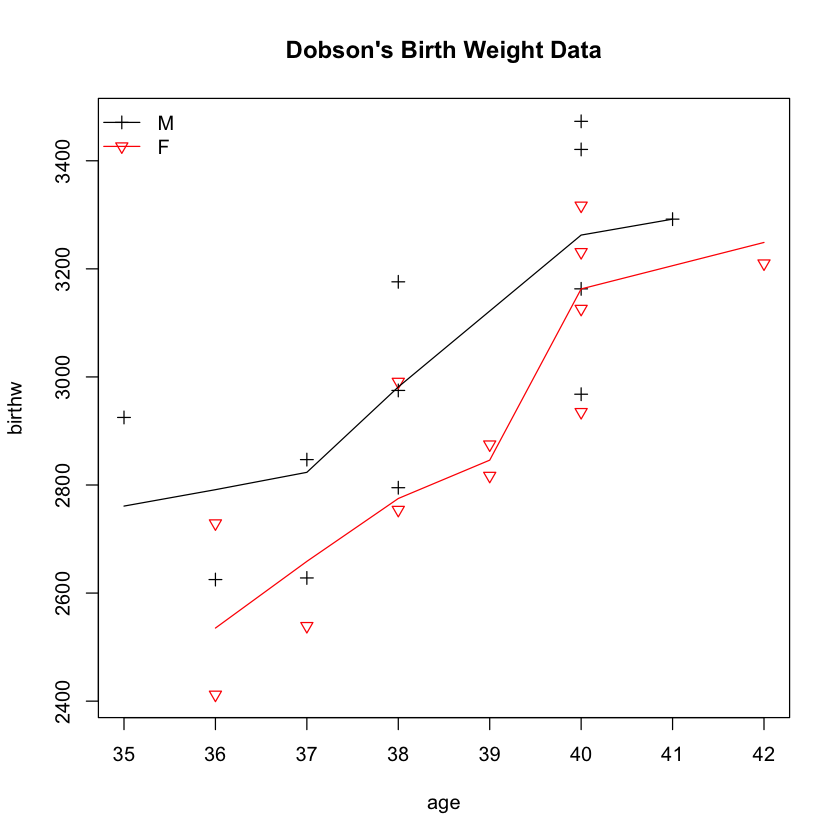

In [4]:
## Birth Weight Data (Page 14)
age <- c(40, 38, 40, 35, 36, 37, 41, 40, 37, 38, 40, 38,
	 40, 36, 40, 38, 42, 39, 40, 37, 36, 38, 39, 40)
birthw <- c(2968, 2795, 3163, 2925, 2625, 2847, 3292, 3473, 2628, 3176,
	    3421, 2975, 3317, 2729, 2935, 2754, 3210, 2817, 3126, 2539,
	    2412, 2991, 2875, 3231)
sex <- gl(2,12, labels=c("M","F"))
plot(age, birthw, col=as.numeric(sex), pch=3*as.numeric(sex),
     main="Dobson's Birth Weight Data")
lines(lowess(age[sex=='M'], birthw[sex=='M']), col=1)
lines(lowess(age[sex=='F'], birthw[sex=='F']), col=2)
legend("topleft", levels(sex), col=1:2, pch=3*(1:2), lty=1, bty="n")

In [5]:
summary(l1 <- lm(birthw ~ sex + age),    correlation=TRUE)


Call:
lm(formula = birthw ~ sex + age)

Residuals:
    Min      1Q  Median      3Q     Max 
-257.49 -125.28  -58.44  169.00  303.98 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1610.28     786.08  -2.049   0.0532 .  
sexF         -163.04      72.81  -2.239   0.0361 *  
age           120.89      20.46   5.908 7.28e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 177.1 on 21 degrees of freedom
Multiple R-squared:   0.64,	Adjusted R-squared:  0.6057 
F-statistic: 18.67 on 2 and 21 DF,  p-value: 2.194e-05

Correlation of Coefficients:
     (Intercept) sexF 
sexF  0.07            
age  -1.00       -0.12


In [6]:
summary(l0 <- lm(birthw ~ sex + age -1), correlation=TRUE)


Call:
lm(formula = birthw ~ sex + age - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-257.49 -125.28  -58.44  169.00  303.98 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
sexM -1610.28     786.08  -2.049   0.0532 .  
sexF -1773.32     794.59  -2.232   0.0367 *  
age    120.89      20.46   5.908 7.28e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 177.1 on 21 degrees of freedom
Multiple R-squared:  0.9969,	Adjusted R-squared:  0.9965 
F-statistic:  2258 on 3 and 21 DF,  p-value: < 2.2e-16

Correlation of Coefficients:
     sexM  sexF 
sexF  1.00      
age  -1.00 -1.00


In [7]:
anova(l1,l0)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
21,658770.7,NA,NA,NA,NA
21,658770.7,0,4.540198e-09,NA,NA


In [8]:
summary(li <- lm(birthw ~ sex + sex:age -1), correlation=TRUE)


Call:
lm(formula = birthw ~ sex + sex:age - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-246.69 -138.11  -39.13  176.57  274.28 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
sexM     -1268.67    1114.64  -1.138 0.268492    
sexF     -2141.67    1163.60  -1.841 0.080574 .  
sexM:age   111.98      29.05   3.855 0.000986 ***
sexF:age   130.40      30.00   4.347 0.000313 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 180.6 on 20 degrees of freedom
Multiple R-squared:  0.9969,	Adjusted R-squared:  0.9963 
F-statistic:  1629 on 4 and 20 DF,  p-value: < 2.2e-16

Correlation of Coefficients:
         sexM  sexF  sexM:age
sexF      0.00               
sexM:age -1.00  0.00         
sexF:age  0.00 -1.00  0.00   


In [9]:
anova(li,l0)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
20,652424.5,NA,NA,NA,NA
21,658770.7,-1,-6346.225,0.1945428,0.6638934


In [10]:
summary(zi <- glm(birthw ~ sex + age, family=gaussian()))


Call:
glm(formula = birthw ~ sex + age, family = gaussian())

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-257.49  -125.28   -58.44   169.00   303.98  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1610.28     786.08  -2.049   0.0532 .  
sexF         -163.04      72.81  -2.239   0.0361 *  
age           120.89      20.46   5.908 7.28e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 31370.04)

    Null deviance: 1829873  on 23  degrees of freedom
Residual deviance:  658771  on 21  degrees of freedom
AIC: 321.39

Number of Fisher Scoring iterations: 2


In [11]:
summary(z0 <- glm(birthw ~ sex + age - 1, family=gaussian()))


Call:
glm(formula = birthw ~ sex + age - 1, family = gaussian())

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-257.49  -125.28   -58.44   169.00   303.98  

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
sexM -1610.28     786.08  -2.049   0.0532 .  
sexF -1773.32     794.59  -2.232   0.0367 *  
age    120.89      20.46   5.908 7.28e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 31370.04)

    Null deviance: 213198964  on 24  degrees of freedom
Residual deviance:    658771  on 21  degrees of freedom
AIC: 321.39

Number of Fisher Scoring iterations: 2


In [12]:
anova(zi, z0)

Resid. Df,Resid. Dev,Df,Deviance
21,658770.7,NA,NA
21,658770.7,0,-1.164153e-10


In [13]:
summary(z.o4 <- update(z0, subset = -4))


Call:
glm(formula = birthw ~ sex + age - 1, family = gaussian(), subset = -4)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-253.86  -129.46   -53.46   165.04   251.14  

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
sexM -2318.03     801.57  -2.892  0.00902 ** 
sexF -2455.44     803.79  -3.055  0.00625 ** 
age    138.50      20.71   6.688 1.65e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 26925.39)

    Null deviance: 204643339  on 23  degrees of freedom
Residual deviance:    538508  on 20  degrees of freedom
AIC: 304.68

Number of Fisher Scoring iterations: 2


In [14]:
summary(zz <- update(z0, birthw ~ sex+age-1 + sex:age))


Call:
glm(formula = birthw ~ sex + age + sex:age - 1, family = gaussian())

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-246.69  -138.11   -39.13   176.57   274.28  

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
sexM     -1268.67    1114.64  -1.138 0.268492    
sexF     -2141.67    1163.60  -1.841 0.080574 .  
age        111.98      29.05   3.855 0.000986 ***
sexF:age    18.42      41.76   0.441 0.663893    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 32621.23)

    Null deviance: 213198964  on 24  degrees of freedom
Residual deviance:    652425  on 20  degrees of freedom
AIC: 323.16

Number of Fisher Scoring iterations: 2


In [15]:
anova(z0,zz)

Resid. Df,Resid. Dev,Df,Deviance
21,658770.7,NA,NA
20,652424.5,1,6346.225


In [16]:
## Poisson Regression Data (Page 42)
x <- c(-1,-1,0,0,0,0,1,1,1)
y <- c(2,3,6,7,8,9,10,12,15)
summary(glm(y~x, family=poisson(link="identity")))


Call:
glm(formula = y ~ x, family = poisson(link = "identity"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7019  -0.3377  -0.1105   0.2958   0.7184  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   7.4516     0.8841   8.428  < 2e-16 ***
x             4.9353     1.0892   4.531 5.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 18.4206  on 8  degrees of freedom
Residual deviance:  1.8947  on 7  degrees of freedom
AIC: 40.008

Number of Fisher Scoring iterations: 3


In [17]:
## Calorie Data (Page 45)
calorie <- data.frame(
    carb = c(33,40,37,27,30,43,34,48,30,38,
	     50,51,30,36,41,42,46,24,35,37),
    age	 = c(33,47,49,35,46,52,62,23,32,42,
	     31,61,63,40,50,64,56,61,48,28),
    wgt	 = c(100, 92,135,144,140,101, 95,101, 98,105,
	     108, 85,130,127,109,107,117,100,118,102),
    prot = c(14,15,18,12,15,15,14,17,15,14,
	     17,19,19,20,15,16,18,13,18,14))
summary(lmcal <- lm(carb~age+wgt+prot, data= calorie))


Call:
lm(formula = carb ~ age + wgt + prot, data = calorie)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3424  -4.8203   0.9897   3.8553   7.9087 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 36.96006   13.07128   2.828  0.01213 * 
age         -0.11368    0.10933  -1.040  0.31389   
wgt         -0.22802    0.08329  -2.738  0.01460 * 
prot         1.95771    0.63489   3.084  0.00712 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.956 on 16 degrees of freedom
Multiple R-squared:  0.4805,	Adjusted R-squared:  0.3831 
F-statistic: 4.934 on 3 and 16 DF,  p-value: 0.01297


In [18]:
## Extended Plant Data (Page 59)
ctl <-	c(4.17,5.58,5.18,6.11,4.50,4.61,5.17,4.53,5.33,5.14)
trtA <- c(4.81,4.17,4.41,3.59,5.87,3.83,6.03,4.89,4.32,4.69)
trtB <- c(6.31,5.12,5.54,5.50,5.37,5.29,4.92,6.15,5.80,5.26)
group <- gl(3, length(ctl), labels=c("Ctl","A","B"))
weight <- c(ctl,trtA,trtB)
anova(lmwg <- lm(weight~group))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
group,2,3.76634,1.8831700,4.846088,0.01590996
Residuals,27,10.49209,0.3885959,NA,NA


In [19]:
summary(lmwg)


Call:
lm(formula = weight ~ group)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0710 -0.4180 -0.0060  0.2627  1.3690 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.0320     0.1971  25.527   <2e-16 ***
groupA       -0.3710     0.2788  -1.331   0.1944    
groupB        0.4940     0.2788   1.772   0.0877 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6234 on 27 degrees of freedom
Multiple R-squared:  0.2641,	Adjusted R-squared:  0.2096 
F-statistic: 4.846 on 2 and 27 DF,  p-value: 0.01591


In [20]:
coef(lmwg)

(Intercept)      groupA      groupB 
      5.032      -0.371       0.494

In [21]:
coef(summary(lmwg))#- incl.  std.err,  t- and P- values.

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.032,0.1971284,25.526514,1.936575e-20
groupA,-0.371,0.2787816,-1.330791,1.943879e-01
groupB,0.494,0.2787816,1.771996,8.768168e-02


In [22]:
## Fictitious Anova Data (Page 64)
y <- c(6.8,6.6,5.3,6.1,7.5,7.4,7.2,6.5,7.8,9.1,8.8,9.1)
a <- gl(3,4)
b <- gl(2,2, length(a))
anova(z <- lm(y~a*b))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
a,2,12.7400000,6.3700000,25.824324,0.001127422
b,1,0.4033333,0.4033333,1.635135,0.248224503
a:b,2,1.2066667,0.6033333,2.445946,0.167164397
Residuals,6,1.4800000,0.2466667,NA,NA


In [23]:
## Achievement Scores (Page 70)
y <- c(6,4,5,3,4,3,6, 8,9,7,9,8,5,7, 6,7,7,7,8,5,7)
x <- c(3,1,3,1,2,1,4, 4,5,5,4,3,1,2, 3,2,2,3,4,1,4)
m <- gl(3,7)
anova(z <- lm(y~x+m))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x,1,36.57548,36.5754813,60.35534,5.427873e-07
m,2,16.93200,8.4660009,13.97024,2.578664e-04
Residuals,17,10.30204,0.6060024,NA,NA


In [24]:
## Beetle Data (Page 78)
dose <- c(1.6907, 1.7242, 1.7552, 1.7842, 1.8113, 1.8369, 1.861, 1.8839)
x <- c( 6, 13, 18, 28, 52, 53, 61, 60)
n <- c(59, 60, 62, 56, 63, 59, 62, 60)
dead <- cbind(x, n-x)
summary(     glm(dead ~ dose, family=binomial(link=logit)))


Call:
glm(formula = dead ~ dose, family = binomial(link = logit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5941  -0.3944   0.8329   1.2592   1.5940  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -60.717      5.181  -11.72   <2e-16 ***
dose          34.270      2.912   11.77   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 284.202  on 7  degrees of freedom
Residual deviance:  11.232  on 6  degrees of freedom
AIC: 41.43

Number of Fisher Scoring iterations: 4


In [25]:
summary(     glm(dead ~ dose, family=binomial(link=probit)))


Call:
glm(formula = dead ~ dose, family = binomial(link = probit))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5714  -0.4703   0.7501   1.0632   1.3449  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -34.935      2.648  -13.19   <2e-16 ***
dose          19.728      1.487   13.27   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 284.20  on 7  degrees of freedom
Residual deviance:  10.12  on 6  degrees of freedom
AIC: 40.318

Number of Fisher Scoring iterations: 4


In [26]:
summary(z <- glm(dead ~ dose, family=binomial(link=cloglog)))


Call:
glm(formula = dead ~ dose, family = binomial(link = cloglog))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.80329  -0.55135   0.03089   0.38315   1.28883  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -39.572      3.240  -12.21   <2e-16 ***
dose          22.041      1.799   12.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 284.2024  on 7  degrees of freedom
Residual deviance:   3.4464  on 6  degrees of freedom
AIC: 33.644

Number of Fisher Scoring iterations: 4


In [27]:
anova(z, update(z, dead ~ dose -1))

Resid. Df,Resid. Dev,Df,Deviance
6,3.446439,NA,NA
7,285.222206,-1,-281.7758


In [28]:
## Anther Data (Page 84)
## Note that the proportions below are not exactly
## in accord with the sample sizes quoted below.
## In particular, the last value, 5/9, should have been 0.556 instead of 0.555:
n <- c(102,  99,   108,	 76,   81,   90)
p <- c(0.539,0.525,0.528,0.724,0.617,0.555)
x <- round(n*p)
## x <- n*p
y <- cbind(x,n-x)
f <- rep(c(40,150,350),2)
(g <- gl(2,3))
summary(glm(y ~ g*f, family=binomial(link="logit")))

[1] 1 1 1 2 2 2
Levels: 1 2


Call:
glm(formula = y ~ g * f, family = binomial(link = "logit"))

Deviance Residuals: 
       1         2         3         4         5         6  
 0.08269  -0.12998   0.04414   0.42320  -0.60082   0.19522  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept)  0.1456719  0.1975451   0.737   0.4609  
g2           0.7963143  0.3125046   2.548   0.0108 *
f           -0.0001227  0.0008782  -0.140   0.8889  
g2:f        -0.0020493  0.0013483  -1.520   0.1285  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 10.45197  on 5  degrees of freedom
Residual deviance:  0.60387  on 2  degrees of freedom
AIC: 38.172

Number of Fisher Scoring iterations: 3


In [29]:
summary(glm(y ~ g + f, family=binomial(link="logit")))


Call:
glm(formula = y ~ g + f, family = binomial(link = "logit"))

Deviance Residuals: 
      1        2        3        4        5        6  
-0.5507  -0.2781   0.7973   1.1558  -0.3688  -0.6584  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)  0.306643   0.167629   1.829   0.0674 .
g2           0.405554   0.174560   2.323   0.0202 *
f           -0.000997   0.000665  -1.499   0.1338  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 10.4520  on 5  degrees of freedom
Residual deviance:  2.9218  on 3  degrees of freedom
AIC: 38.49

Number of Fisher Scoring iterations: 3


In [30]:
## The "final model"
summary(glm.p84 <- glm(y~g,  family=binomial(link="logit")))


Call:
glm(formula = y ~ g, family = binomial(link = "logit"))

Deviance Residuals: 
       1         2         3         4         5         6  
 0.17150  -0.10947  -0.06177   1.77208  -0.19040  -1.39686  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   0.1231     0.1140   1.080   0.2801  
g2            0.3985     0.1741   2.289   0.0221 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 10.452  on 5  degrees of freedom
Residual deviance:  5.173  on 4  degrees of freedom
AIC: 38.741

Number of Fisher Scoring iterations: 3


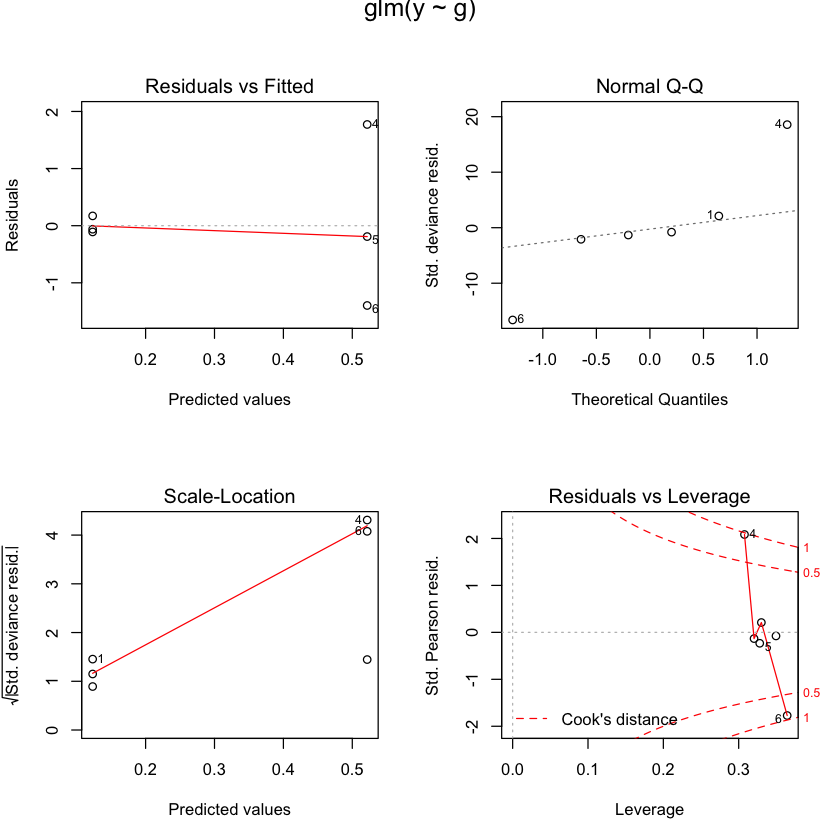

In [31]:
op <- par(mfrow = c(2,2), oma = c(0,0,1,0))
plot(glm.p84) # well ?
par(op)

In [32]:
## Tumour Data (Page 92)
counts <- c(22,2,10,16,54,115,19,33,73,11,17,28)
type <- gl(4,3,12,labels=c("freckle","superficial","nodular","indeterminate"))
site <- gl(3,1,12,labels=c("head/neck","trunk","extremities"))
data.frame(counts,type,site)

counts,type,site
22,freckle,head/neck
2,freckle,trunk
10,freckle,extremities
16,superficial,head/neck
54,superficial,trunk
115,superficial,extremities
19,nodular,head/neck
33,nodular,trunk
73,nodular,extremities
11,indeterminate,head/neck


In [33]:
summary(z <- glm(counts ~ type + site, family=poisson()))


Call:
glm(formula = counts ~ type + site, family = poisson())

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0453  -1.0741   0.1297   0.5857   5.1354  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)         1.7544     0.2040   8.600  < 2e-16 ***
typesuperficial     1.6940     0.1866   9.079  < 2e-16 ***
typenodular         1.3020     0.1934   6.731 1.68e-11 ***
typeindeterminate   0.4990     0.2174   2.295  0.02173 *  
sitetrunk           0.4439     0.1554   2.857  0.00427 ** 
siteextremities     1.2010     0.1383   8.683  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 295.203  on 11  degrees of freedom
Residual deviance:  51.795  on  6  degrees of freedom
AIC: 122.91

Number of Fisher Scoring iterations: 5


In [34]:
## Randomized Controlled Trial (Page 93)
counts <- c(18,17,15, 20,10,20, 25,13,12)
outcome   <- gl(3, 1, length(counts))
treatment <- gl(3, 3)
summary(z <- glm(counts ~ outcome + treatment, family=poisson()))


Call:
glm(formula = counts ~ outcome + treatment, family = poisson())

Deviance Residuals: 
       1         2         3         4         5         6         7         8  
-0.67125   0.96272  -0.16965  -0.21999  -0.95552   1.04939   0.84715  -0.09167  
       9  
-0.96656  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.045e+00  1.709e-01  17.815   <2e-16 ***
outcome2    -4.543e-01  2.022e-01  -2.247   0.0246 *  
outcome3    -2.930e-01  1.927e-01  -1.520   0.1285    
treatment2   1.857e-16  2.000e-01   0.000   1.0000    
treatment3   4.441e-17  2.000e-01   0.000   1.0000    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 10.5814  on 8  degrees of freedom
Residual deviance:  5.1291  on 4  degrees of freedom
AIC: 56.761

Number of Fisher Scoring iterations: 4


In [35]:
## Peptic Ulcers and Blood Groups
counts <- c(579, 4219, 911, 4578, 246, 3775, 361, 4532, 291, 5261, 396, 6598)
group <- gl(2, 1, 12, labels=c("cases","controls"))
blood <- gl(2, 2, 12, labels=c("A","O"))
city  <- gl(3, 4, 12, labels=c("London","Manchester","Newcastle"))
cbind(group, blood, city, counts) # gives internal codes for the factors

group,blood,city,counts
1,1,1,579
2,1,1,4219
1,2,1,911
2,2,1,4578
1,1,2,246
2,1,2,3775
1,2,2,361
2,2,2,4532
1,1,3,291
2,1,3,5261


In [36]:
summary(z1 <- glm(counts ~ group*(city + blood), family=poisson()))


Call:
glm(formula = counts ~ group * (city + blood), family = poisson())

Deviance Residuals: 
      1        2        3        4        5        6        7        8  
-0.7520   3.0183   0.6099  -2.8137   0.1713  -0.4339  -0.1405   0.3977  
      9       10       11       12  
 0.9318  -2.2691  -0.7742   2.0648  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   6.39239    0.03476  183.92  < 2e-16 ***
groupcontrols                 1.90813    0.03691   51.69  < 2e-16 ***
cityManchester               -0.89800    0.04815  -18.65  < 2e-16 ***
cityNewcastle                -0.77420    0.04612  -16.79  < 2e-16 ***
bloodO                        0.40187    0.03867   10.39  < 2e-16 ***
groupcontrols:cityManchester  0.84069    0.05052   16.64  < 2e-16 ***
groupcontrols:cityNewcastle   1.07287    0.04822   22.25  < 2e-16 ***
groupcontrols:bloodO         -0.23208    0.04043   -5.74 9.46e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 

In [37]:
summary(z2 <- glm(counts ~ group*city + blood, family=poisson()),
        correlation = TRUE)


Call:
glm(formula = counts ~ group * city + blood, family = poisson())

Deviance Residuals: 
      1        2        3        4        5        6        7        8  
-3.7688   3.7168   3.2813  -3.4418  -1.7675   0.2387   1.5565  -0.2174  
      9       10       11       12  
-1.1458  -1.4687   1.0218   1.3275  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   6.51395    0.02663  244.60   <2e-16 ***
groupcontrols                 1.77563    0.02801   63.38   <2e-16 ***
cityManchester               -0.89800    0.04815  -18.65   <2e-16 ***
cityNewcastle                -0.77420    0.04612  -16.79   <2e-16 ***
bloodO                        0.18988    0.01128   16.84   <2e-16 ***
groupcontrols:cityManchester  0.84069    0.05052   16.64   <2e-16 ***
groupcontrols:cityNewcastle   1.07287    0.04822   22.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family ta

In [38]:
anova(z2, z1, test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
5,62.55839,NA,NA,NA
4,29.24072,1,33.31767,7.826818e-09
